## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, ELU  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping  
from tensorflow.keras.callbacks import ModelCheckpoint
import keras_tuner as kt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2024-10-10 20:11:24.410868: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_value = 200
application_types_to_replace = application_type_counts[application_type_counts < cutoff_value].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_types = application_df['CLASSIFICATION'].value_counts()
classification_types

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications = classification_types[classification_types > 1]
classifications.value_counts

<bound method IndexOpsMixin.value_counts of CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64>

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_types[classification_types < 100].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [10]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns=["IS_SUCCESSFUL"])
y = application_df["IS_SUCCESSFUL"]


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

Identify Outliers

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# Identify outliers using IQR (Add this below)
numeric_cols = X_train.select_dtypes(include=['float64', 'int64'])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Calculate outliers
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

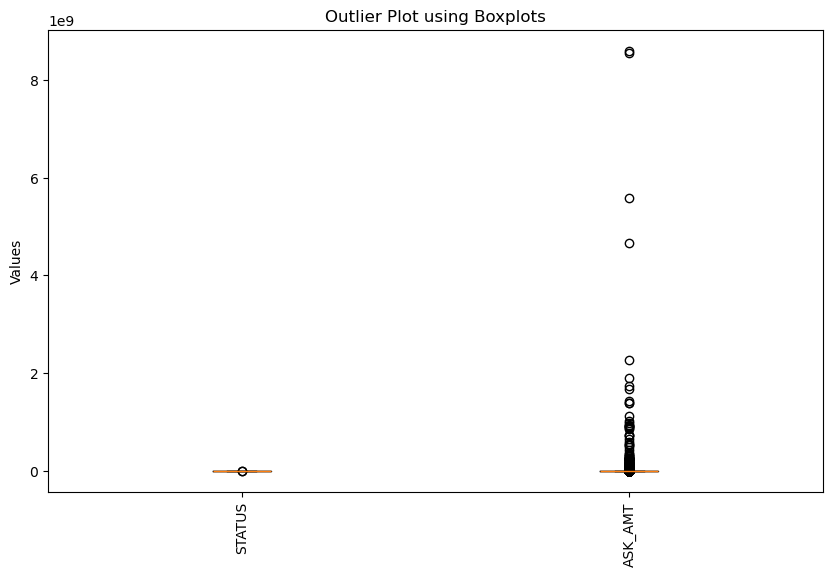

Number of outliers detected: 6171


,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
30367,1,13446,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1345,1,68522,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
20707,1,415726,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
20780,1,1954219,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
25293,1,473430,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [12]:
# Create an outlier plot
plt.figure(figsize=(10, 6))
plt.boxplot([X_train[col] for col in numeric_cols.columns], labels=numeric_cols.columns)
plt.xticks(rotation=90)
plt.title('Outlier Plot using Boxplots')
plt.ylabel('Values')
plt.show()

# Determine which data points are outliers
outlier_indices = np.where(outliers.any(axis=1))
outlier_points = X_train.iloc[outlier_indices]

# Display outlier points
print(f'Number of outliers detected: {len(outlier_points)}')
outlier_points.head()

In [13]:
# Remove outliers from X_train and synchronize with y_train
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
outlier_indices = X_train[outliers.any(axis=1)].index

# Remove outliers in training data
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
X_train_cleaned = X_train.loc[~outliers.any(axis=1)]
y_train_cleaned = y_train.loc[X_train_cleaned.index]

# Ensure the same number of features are in the test set
X_test_cleaned = X_test 

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train_cleaned)

# Scale the data
# Scale the cleaned data
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

## Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,461 (25.24 KB)

 Trainable params: 6,461 (25.24 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train_cleaned, epochs=100)

Epoch 1/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7099 - loss: 0.5794
Epoch 2/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7478 - loss: 0.5290
Epoch 3/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7468 - loss: 0.5353
Epoch 4/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7509 - loss: 0.5244
Epoch 5/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7515 - loss: 0.5281
Epoch 6/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7522 - loss: 0.5202
Epoch 7/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7400 - loss: 0.5349
Epoch 8/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7548 - loss: 0.5208
Epoch 9/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7513 - loss: 0.5238
Epoch 10/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7450 - loss: 0.5305
Epoch 11/100
612/612 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7525 - loss: 0.5241
Epoch 12/100
612/612 ━━━━━━━━━━━━━━━━━━━━

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 5ms/step - accuracy: 0.7029 - loss: 189.8405
Loss: 189.8404541015625, Accuracy: 0.7028571367263794


In [19]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Outliers.h5")